In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style= "darkgrid")
%matplotlib inline

In [5]:
import torch

In [7]:
ckpt = torch.load('/workspace/SE_2022/model_experiment/db-aiat/training_script/1st_trial_30epoch/CP_dir/checkpoint_early_exit_10th.pth.tar')

In [10]:
ckpt.keys()

dict_keys(['epoch', 'model_state_dict', 'optimizer_state_dict', 'tr_loss', 'cv_loss', 'best_cv_loss'])

In [12]:
ckpt['optimizer_state_dict'].keys()

dict_keys(['state', 'param_groups'])

In [12]:
train_loss_list = []
val_loss_list = []
for nth in range(1, 31):
    path = f'/workspace/SE_2022/model_experiment/db-aiat/training_script/CP_dir/checkpoint_early_exit_{nth}th.pth.tar'
    checkpoint = torch.load(path)
    train_loss_list.append(checkpoint['tr_loss'])
    val_loss_list.append(checkpoint['cv_loss'])

<AxesSubplot:>

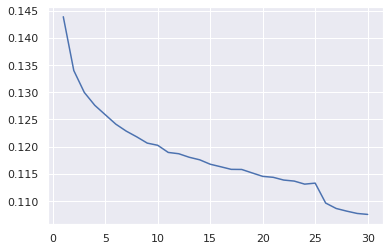

In [13]:
sns.lineplot(x=range(1, 31), y=train_loss_list)

<AxesSubplot:>

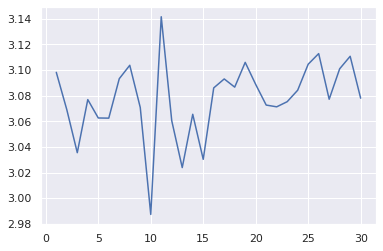

In [14]:
sns.lineplot(x=range(1, 31), y=val_loss_list)